In [24]:
import pandas as pd
import numpy as np

#Load dataset
from sklearn import datasets
data_iris = datasets.load_iris()

In [25]:
#Load dataset
from sklearn import datasets
data_iris = datasets.load_iris()
print(data_iris.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [2]:
data = pd.read_csv('iris.csv')

In [3]:
data.shape


(150, 6)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [5]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [7]:
X = data.iloc[:,:-1].values #last column values excluded

In [8]:
y = data.iloc[:,-1].values #last column value

In [9]:
#Splitting the dataset into the Training set and Test set

In [10]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.40,random_state=0)  

In [11]:
len(x_test)

60

In [12]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [13]:
classifier = KNeighborsClassifier(n_neighbors = 9)

In [14]:
#training the classifier
classifier.fit(x_train, y_train) 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=9, p=2,
                     weights='uniform')

In [15]:
#making precdictions
y_pred   = classifier.predict(x_test) 

In [16]:
y_pred

array(['Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-setosa', 'Iris-versicolor', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor'

In [17]:
#Accuracy   score
print('accuracy   is',accuracy_score(y_pred,y_test)*100) 

accuracy   is 100.0


In [18]:
#to evaluate the quality of the output
print(confusion_matrix(y_test, y_pred)) 

[[16  0  0]
 [ 0 23  0]
 [ 0  0 21]]


In [19]:
#Summary of the predictions made by the   classifier
print(classification_report(y_test,   y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        16
Iris-versicolor       1.00      1.00      1.00        23
 Iris-virginica       1.00      1.00      1.00        21

       accuracy                           1.00        60
      macro avg       1.00      1.00      1.00        60
   weighted avg       1.00      1.00      1.00        60



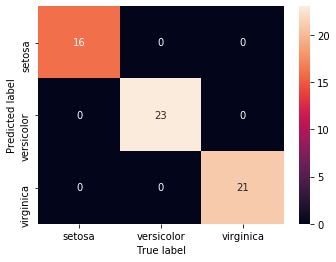

In [20]:
#Visualizing Confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt
cm  = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(cm,index = ['setosa','versicolor','virginica'], columns = ['setosa','versicolor','virginica'])
plt.figure(figsize=(5.5,4))
sns.heatmap(cm_df,   annot=True)
plt.ylabel('Predicted label')
plt.xlabel('True label')
plt.show()


In [21]:
new1=[[10, 4.9,3.0,1.4,0.2]]
new2=[[60,5.2,2.7,3.9,1.4]]
new3=[[120,6.0,2.2,5.0,1.5]]

print(classifier.predict(new3)[0])
    

Iris-virginica


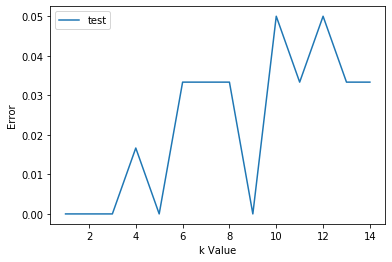

In [22]:
#To decide the value of 'k'
import numpy as np
import matplotlib.pyplot as plt
error2= []
for k in range(1,15):
    classifier= KNeighborsClassifier(n_neighbors=k)
    classifier.fit(x_train,y_train)
    y_pred2= classifier.predict(x_test)
    error2.append(np.mean(y_test!= y_pred2))
    

plt.plot(range(1,15),error2,label="test")
plt.xlabel('k Value')
plt.ylabel('Error')
plt.legend()